# Decision Tree Classifier for Credits

In [23]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [24]:
credit_df = pd.read_csv( "German Credit Data.csv" )
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [25]:
credit_df.shape

(1000, 14)

In [26]:
credit_df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [27]:
credit_df.status.value_counts()

0    700
1    300
Name: status, dtype: int64

In [28]:
X_features = list(
credit_df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [29]:
encoded_credit_df = pd.get_dummies( credit_df[X_features],
drop_first =True)

In [30]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [31]:
import statsmodels.api as sm
Y = credit_df.status
X = sm.add_constant( encoded_credit_df )

In [32]:
Y = credit_df.status
X = encoded_credit_df
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y,
    test_size = 0.3, random_state = 42)

### Using Gini Criteria (default)

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini',
    max_depth = 3 )

In [34]:
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=3)

In [35]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
 max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, 
                       random_state=None,splitter='best')

DecisionTreeClassifier(max_depth=3, presort=False)

In [36]:
tree_predict = clf_tree.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

0.5835743204164258

[Text(334.8, 380.52, 'X[8] <= 0.5\ngini = 0.419\nsamples = 700\nvalue = [491, 209]'),
 Text(167.4, 271.8, 'X[0] <= 33.0\ngini = 0.484\nsamples = 425\nvalue = [251, 174]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 10975.5\ngini = 0.458\nsamples = 343\nvalue = [221, 122]'),
 Text(41.85, 54.360000000000014, 'gini = 0.451\nsamples = 337\nvalue = [221, 116]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(251.10000000000002, 163.07999999999998, 'X[16] <= 0.5\ngini = 0.464\nsamples = 82\nvalue = [30, 52]'),
 Text(209.25, 54.360000000000014, 'gini = 0.431\nsamples = 70\nvalue = [22, 48]'),
 Text(292.95, 54.360000000000014, 'gini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(502.20000000000005, 271.8, 'X[25] <= 0.5\ngini = 0.222\nsamples = 275\nvalue = [240, 35]'),
 Text(418.5, 163.07999999999998, 'X[3] <= 2.5\ngini = 0.423\nsamples = 46\nvalue = [32, 14]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.491\nsamples = 23\nvalue = [13

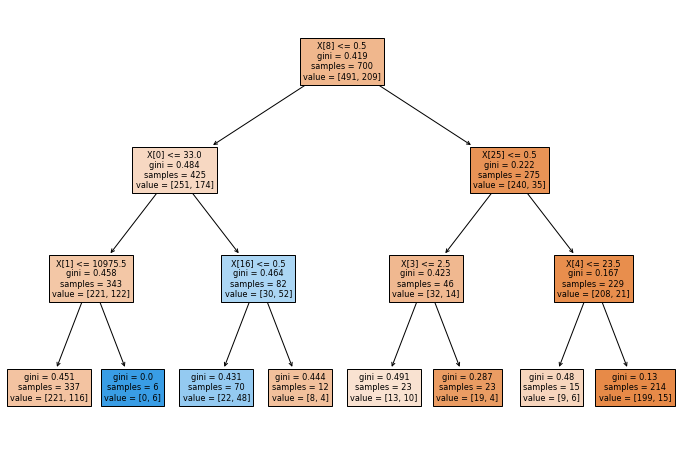

In [37]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_tree.fit(X_train, y_train), filled=True) 

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_predict))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       209
           1       0.65      0.22      0.33        91

    accuracy                           0.73       300
   macro avg       0.69      0.58      0.58       300
weighted avg       0.71      0.73      0.68       300



In [39]:
gini_node_1 = 1-pow(491/700, 2)- pow (209/700, 2)
print( round( gini_node_1, 4) )

0.4189


In [40]:
X_test.shape

(300, 29)

### Using Entropy Criteria

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf_tree_entropy = DecisionTreeClassifier(criterion = 'entropy',
    max_depth = 3 )

In [45]:
clf_tree_entropy.fit( X_train, y_train )

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [46]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
 max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, 
                       random_state=None,splitter='best')

DecisionTreeClassifier(criterion='entropy', max_depth=3, presort=False)

[Text(334.8, 380.52, 'X[8] <= 0.5\nentropy = 0.88\nsamples = 700\nvalue = [491, 209]'),
 Text(167.4, 271.8, 'X[0] <= 33.0\nentropy = 0.976\nsamples = 425\nvalue = [251, 174]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 10975.5\nentropy = 0.939\nsamples = 343\nvalue = [221, 122]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.929\nsamples = 337\nvalue = [221, 116]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(251.10000000000002, 163.07999999999998, 'X[20] <= 0.5\nentropy = 0.947\nsamples = 82\nvalue = [30, 52]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.983\nsamples = 66\nvalue = [28, 38]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.544\nsamples = 16\nvalue = [2, 14]'),
 Text(502.20000000000005, 271.8, 'X[25] <= 0.5\nentropy = 0.55\nsamples = 275\nvalue = [240, 35]'),
 Text(418.5, 163.07999999999998, 'X[3] <= 2.5\nentropy = 0.887\nsamples = 46\nvalue = [32, 14]'),
 Text(376.65000000000003, 54.360000000000014, 'entropy = 

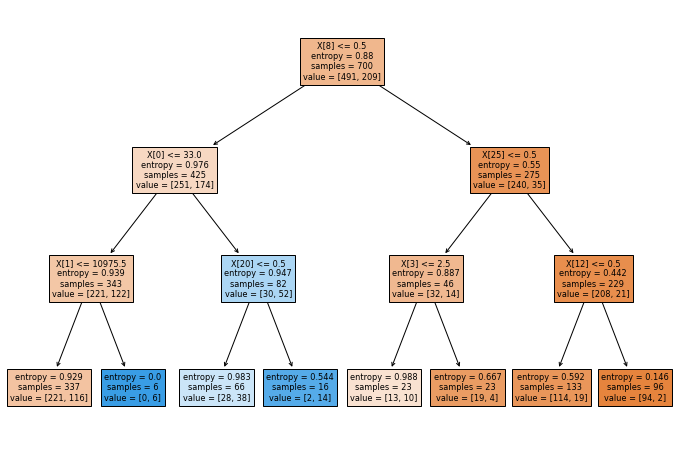

In [48]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_tree_entropy.fit(X_train, y_train), filled=True) 

In [49]:
import math
entropy_node_1 = -(491/700) * math.log2(491/700)- (209/700) * math.log2(209/700)
print( round( entropy_node_1, 2) )

0.88


In [50]:
tree_predict_entropy = clf_tree_entropy.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict_entropy )

0.5763972869236027

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_predict_entropy))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       209
           1       0.59      0.22      0.32        91

    accuracy                           0.72       300
   macro avg       0.66      0.58      0.57       300
weighted avg       0.69      0.72      0.67       300



### Find Optimal DT

In [52]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'],
        'max_depth': range(2,10)}]
clf_tree_opt = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree_opt,
            tuned_parameters,
            cv=10,
            scoring='roc_auc')
clf.fit(X_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [53]:
clf.best_score_

0.6830090864917396

In [54]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}